<a href="https://colab.research.google.com/github/giuliabugatti09/bank_credit_card_churn_predicition/blob/main/notebook/bank_credit_card_churn_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Cancelamento do Serviço de Cartão de Crédito do Banco**

**Importando as bibliotecas**

In [ ]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Divisão dos dados
from sklearn.model_selection import train_test_split

# Filtrar avisos
import warnings
warnings.filterwarnings('ignore')

### Configurações de Visualização
%matplotlib inline


mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Definição da paleta de cores
paleta_cores = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#8ab17d']
# Configurar como paleta padrão
sns.set_palette(sns.color_palette(paleta_cores))
# Exibir a paleta
sns.color_palette(paleta_cores)


[(0.14901960784313725, 0.27450980392156865, 0.3254901960784314),
 (0.16470588235294117, 0.615686274509804, 0.5607843137254902),
 (0.9137254901960784, 0.7686274509803922, 0.41568627450980394),
 (0.9568627450980393, 0.6352941176470588, 0.3803921568627451),
 (0.9058823529411765, 0.43529411764705883, 0.3176470588235294),
 (0.5411764705882353, 0.6941176470588235, 0.49019607843137253)]

**Entendendo os dados**

In [ ]:
import pandas as pd

# Caminho do arquivo
data_path = 'https://raw.githubusercontent.com/giuliabugatti09/bank_credit_card_churn_predicition/main/input/BankChurners.csv'

df = pd.read_csv(data_path)

# Recursos que podem ser removidos.
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace=True)



In [ ]:
df.head()


,"CLIENTNUM""",Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM"                10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
"CLIENTNUM""",10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [ ]:
df.isna().sum()


,0
"CLIENTNUM""",0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


Não há valores ausentes ou duplicados.


**Dividindo os dados em conjuntos de treinamento e teste**

In [ ]:
# Dividir os dados em variáveis preditoras (X) e variável alvo (y)
# Ensure the column name is correct, including case and whitespace
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag'].copy()  # Changed 'churn_flag' to 'Attrition_Flag'

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Imprimir as formas dos conjuntos de treino e teste
print(f'Forma do conjunto de treino (preditor): {X_train.shape}.')
print(f'Forma do conjunto de treino (alvo): {y_train.shape}.')
print(f'Forma do conjunto de teste (preditor): {X_test.shape}.')
print(f'Forma do conjunto de teste (alvo): {y_test.shape}.')

Forma do conjunto de treino (preditor): (8101, 20).
Forma do conjunto de treino (alvo): (8101,).
Forma do conjunto de teste (preditor): (2026, 20).
Forma do conjunto de teste (alvo): (2026,).


**Análise Exploratória de Dados**

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,"CLIENTNUM""",Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
1602,806407308,54,F,3,College,Single,Unknown,Blue,49,6,...,3,13184.0,0,13184.0,1.166,2047,33,0.179,0.000,Attrited Customer
7791,801786483,51,M,0,High School,Single,$80K - $120K,Blue,45,3,...,3,10648.0,2517,8131.0,0.708,4930,89,0.978,0.236,Existing Customer
7177,779870883,45,F,4,High School,Single,$40K - $60K,Blue,29,3,...,1,4595.0,1781,2814.0,0.708,3746,68,0.545,0.388,Existing Customer
97,720336708,53,M,3,Doctorate,Married,$40K - $60K,Blue,35,5,...,2,3789.0,1706,2083.0,1.047,1609,42,0.680,0.450,Existing Customer
4820,716769783,48,F,2,Graduate,Married,Unknown,Blue,40,3,...,4,5104.0,736,4368.0,0.679,3943,78,0.696,0.144,Existing Customer


In [ ]:
recursos_numericos = X_train.select_dtypes('number').columns.tolist()
recursos_categoricos = X_train.select_dtypes('object').columns.tolist()
target = 'churn_flag'
print(f'Existem {len(recursos_numericos)} variáveis numéricas. Elas são: ')
print(recursos_numericos)
print(f'\nExistem {len(recursos_categoricos)} variáveis categóricas. Elas são: ')
print(recursos_categoricos)
print(f'\nA variável alvo é: {target}.')


Existem 15 variáveis numéricas. Elas são: 
['CLIENTNUM"', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Existem 5 variáveis categóricas. Elas são: 
['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

A variável alvo é: churn_flag.


**Distribuição alvo**

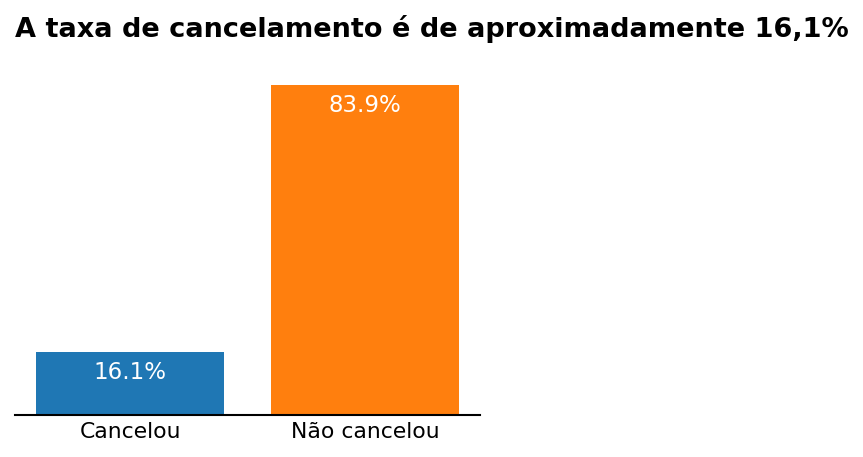

In [ ]:
# Agrupar os dados pelo indicador de cancelamento.

churn_grp = train.groupby(['Attrition_Flag'])[['Attrition_Flag']].count().rename(columns={'Attrition_Flag': 'quantidade'}).reset_index()
churn_grp['percentual'] = (churn_grp['quantidade'] / churn_grp['quantidade'].sum()) * 100
churn_grp = churn_grp.sort_values(by=['percentual'])

# Definir o gráfico.
fig, ax = plt.subplots(figsize=(4, 3))

# Criar o gráfico de barras.
barras = ax.bar(x=churn_grp['Attrition_Flag'], height=churn_grp['percentual'], color=['#1f77b4', '#ff7f0e'])
# Personalizar o gráfico.
ax.set_title('A taxa de cancelamento é de aproximadamente 16,1%', fontweight='bold', fontsize=13, pad=15, loc='left')
ax.set_xlabel('')
ax.set_xticks(ticks=range(2), labels=['Não cancelou', 'Cancelou'], fontsize=10.5)
ax.tick_params(axis='both', which='both', length=0)
ax.invert_xaxis()

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='magma', ax=eixo)

for barra in barras:
    altura = barra.get_height()
    ax.annotate('{:.1f}%'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, -10),
                textcoords="offset points",
                ha='center', va='center',
                fontsize=11, color='white')


**Distribuição recursos numéricos**

Colunas disponíveis no DataFrame: Index(['CLIENTNUM"', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag'],
      dtype='object')


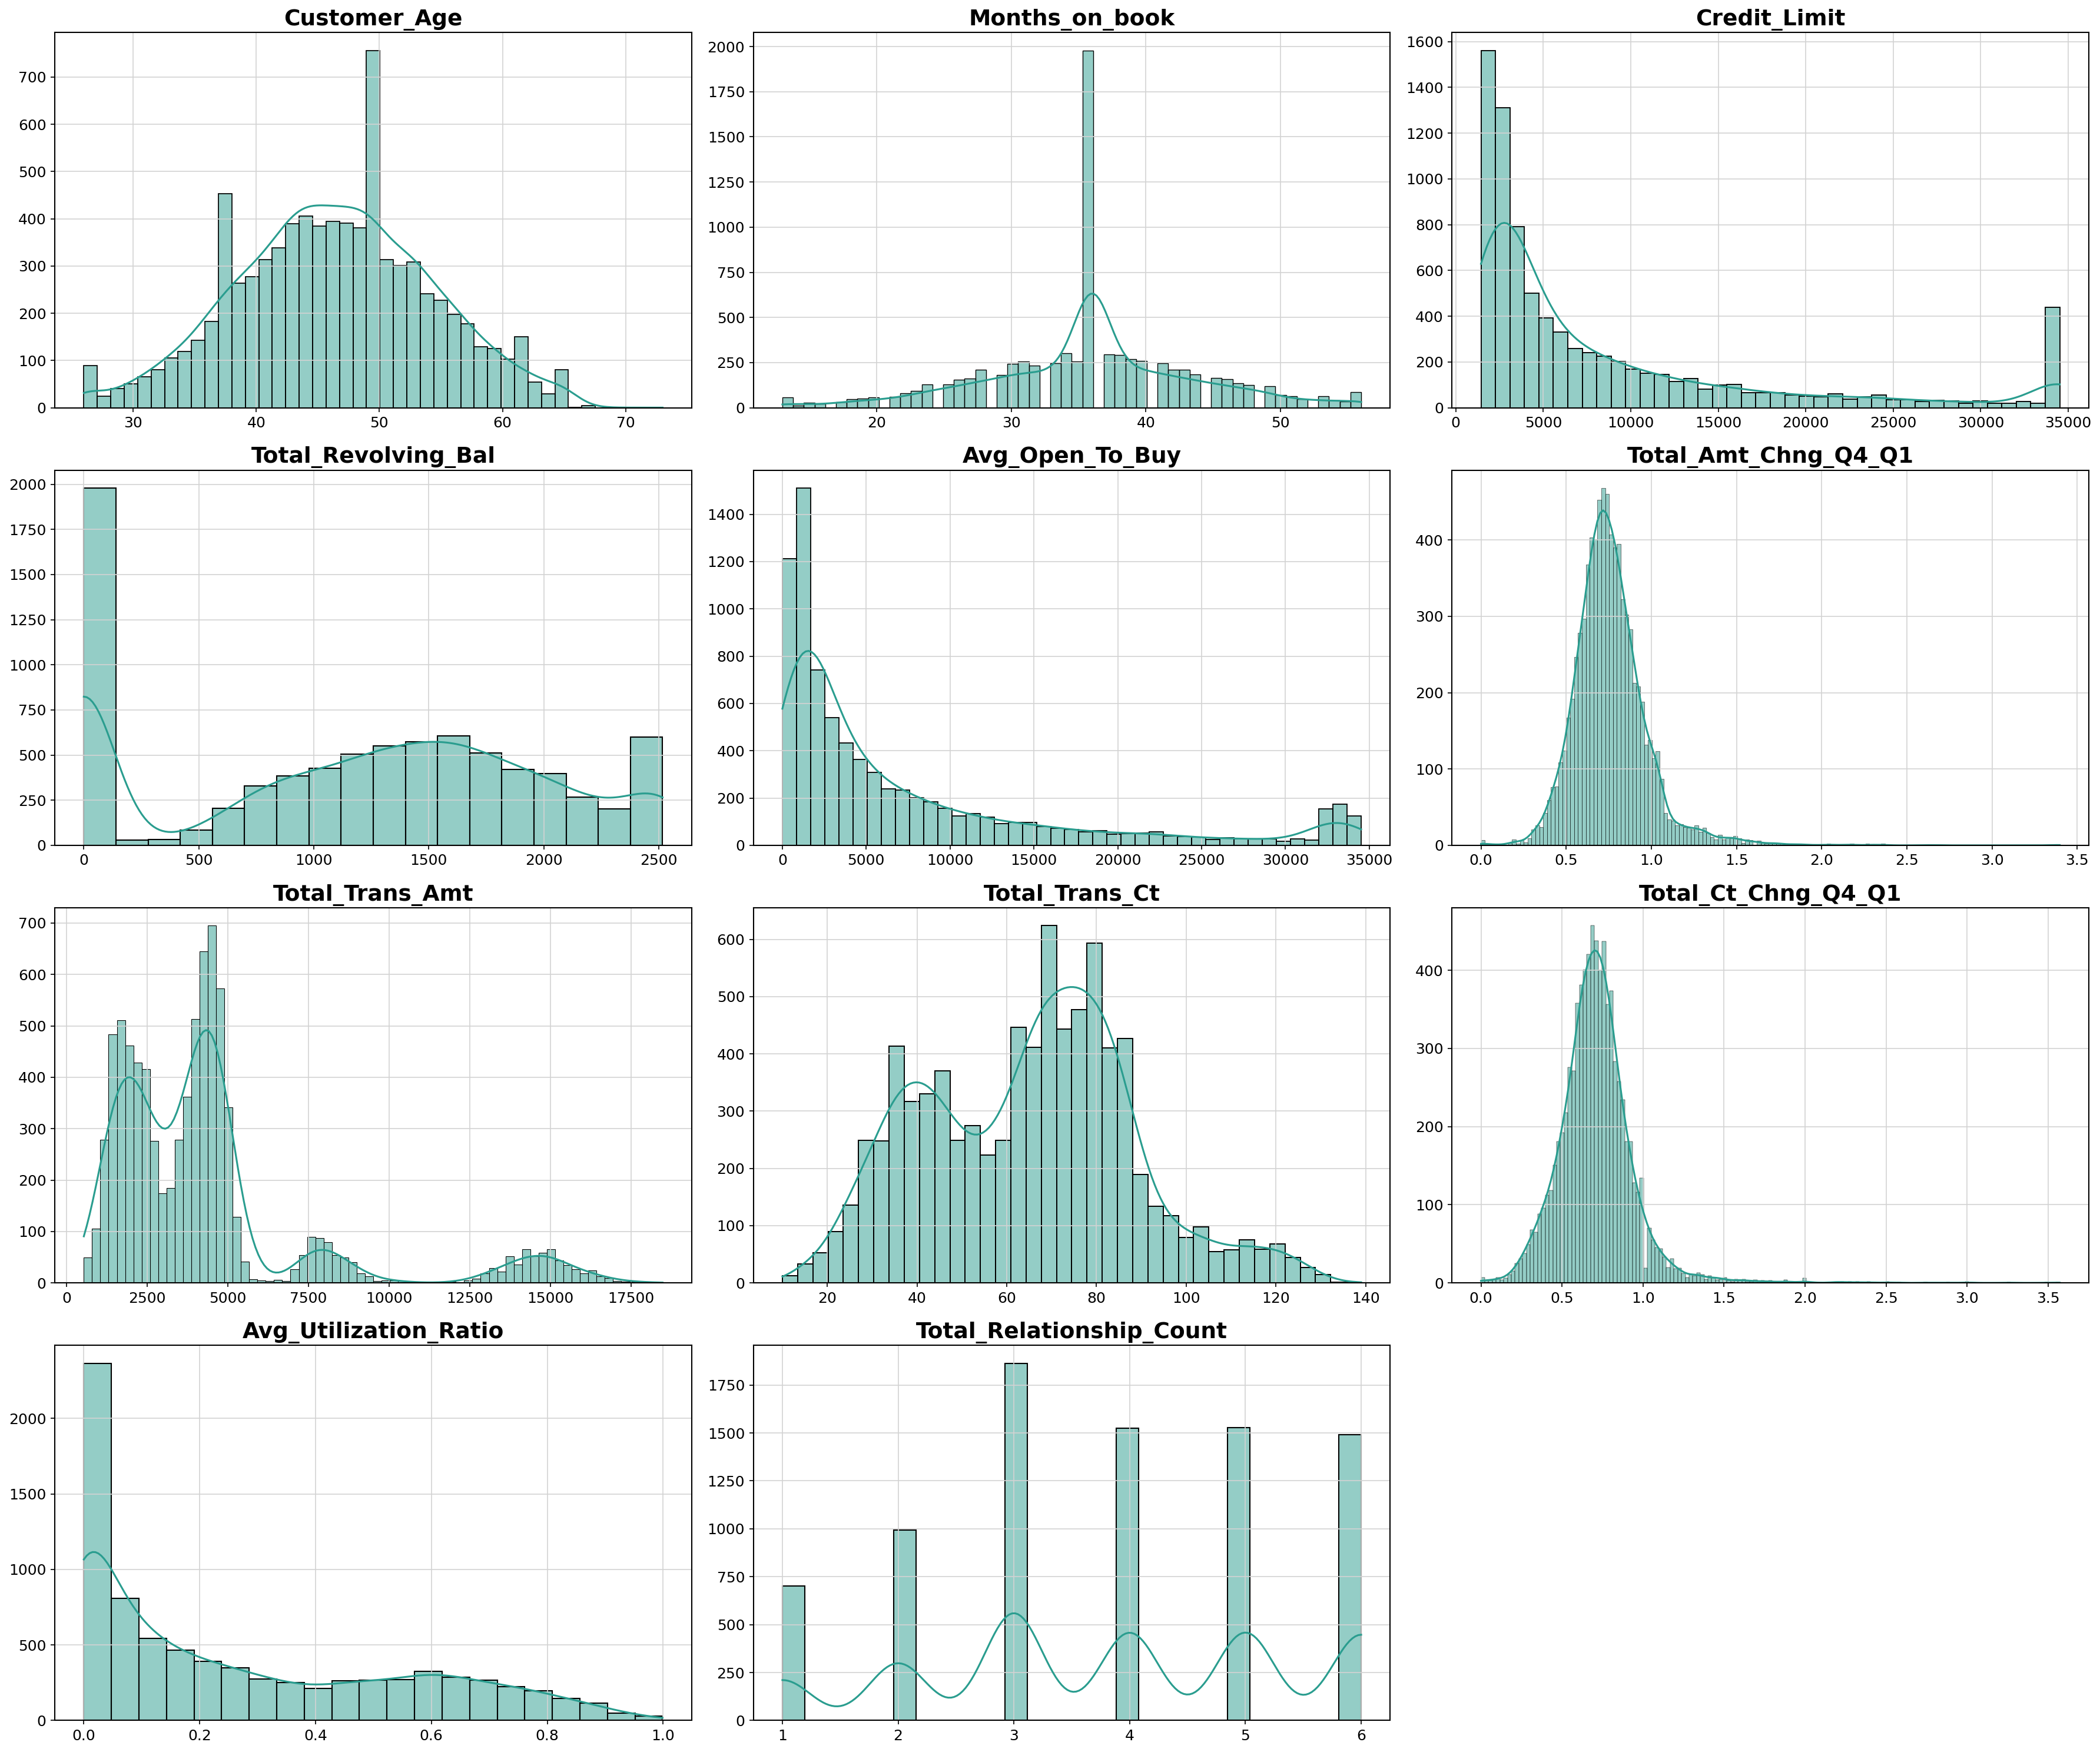

<Axes: title={'center': 'Taxa de Cancelamento por Card_Category'}, xlabel='Card_Category', ylabel='Proporção de Cancelamento'>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def analise_graficos(dados, variaveis, kde=False, figsize=(24, 20)):
    """
    Gera gráficos de distribuição para variáveis numéricas.

    Args:
        dados (pd.DataFrame): DataFrame contendo os dados.
        variaveis (list): Lista de nomes das colunas numéricas a serem plotadas.
        kde (bool, opcional): Se True, plota a estimativa de densidade kernel. Padrão é False.
        figsize (tuple, opcional): Tamanho da figura. Padrão é (35, 30).
    """
    num_graficos = len(variaveis)
    num_colunas = 3  # Número de colunas na grade de gráficos
    num_linhas = (num_graficos + num_colunas - 1) // num_colunas  # Número de linhas na grade de gráficos

    fig, eixos = plt.subplots(num_linhas, num_colunas, figsize=figsize)
    eixos = eixos.flatten()  # Achatar a matriz de eixos para facilitar a iteração

    print("Colunas disponíveis no DataFrame:", dados.columns)  # Debugging

    for i, variavel in enumerate(variaveis):
        eixo = eixos[i]

        # Verificar se a variável existe no DataFrame
        if variavel in dados.columns:
            sns.histplot(data=dados, x=variavel, kde=kde, ax=eixo, color='#2a9d8f')
            eixo.set_title(variavel, fontsize=18, fontweight='bold')
            eixo.set_xlabel('')  # Remover rótulo do eixo x
            eixo.set_ylabel('')  # Remover rótulo do eixo y
        else:
            print(f"Variável '{variavel}' não encontrada no DataFrame. Pulando.")

    # Ocultar eixos vazios, se houver
    for i in range(num_graficos, num_linhas * num_colunas):
        eixos[i].set_visible(False)

    plt.tight_layout()
    plt.show()

numplots_features = ['Customer_Age',
                     'Months_on_book',
                     'Credit_Limit',
                     'Total_Revolving_Bal',
                     'Avg_Open_To_Buy',
                     'Total_Amt_Chng_Q4_Q1',
                     'Total_Trans_Amt',
                     'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1',
                     'Avg_Utilization_Ratio',
                     'Total_Relationship_Count']

analise_graficos(dados=train, variaveis=numplots_features, kde=True, figsize=(24, 20))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='magma', ax=eixo)



**Proporção de cancelamento**

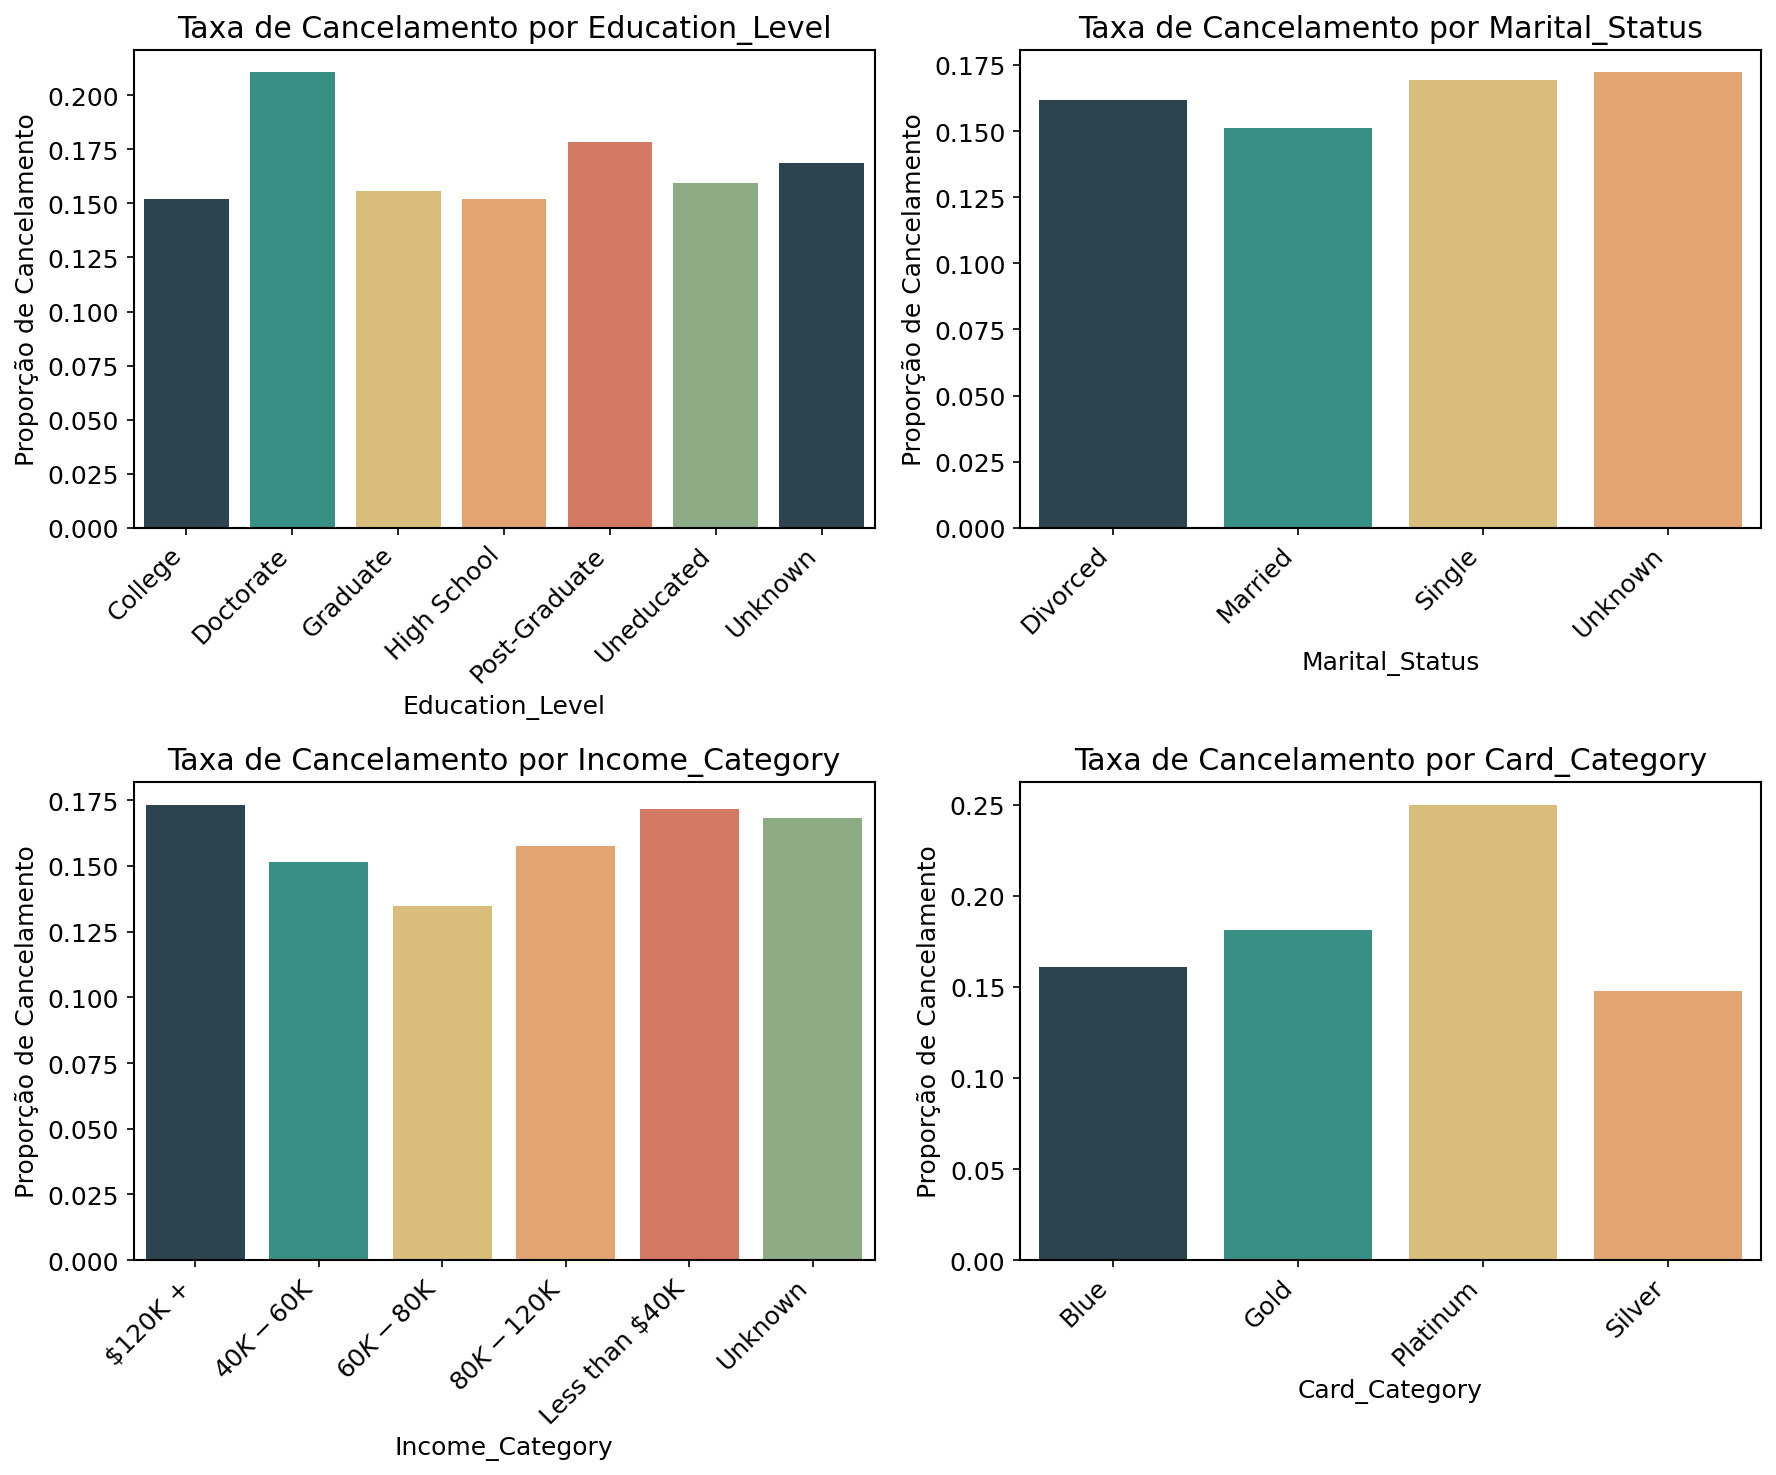

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um DataFrame para armazenar proporções de cancelamento por categoria
categorical_features = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Calcula a quantidade de linhas e colunas para o grid de gráficos
num_colunas = 2
num_linhas = (len(categorical_features) + num_colunas - 1) // num_colunas

# Cria a figura e os eixos do gráfico
fig, eixos = plt.subplots(num_linhas, num_colunas, figsize=(12, 5 * num_linhas))

# Convert 'Attrition_Flag' to numerical before calculating the mean
df['Attrition_Flag_Numeric'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Itera sobre as características categóricas e plota os gráficos
for i, feature in enumerate(categorical_features):
    # Calcula a posição do gráfico na grade
    linha = i // num_colunas
    coluna = i % num_colunas
    eixo = eixos[linha, coluna]

    # Calcula as taxas de cancelamento por categoria
    churn_rates = df.groupby(feature)['Attrition_Flag_Numeric'].mean()

    # Cria o gráfico de barras
    sns.barplot(x=churn_rates.index, y=churn_rates.values, palette= ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#8ab17d'], ax=eixo)
    eixo.set_title(f'Taxa de Cancelamento por {feature}')
    eixo.set_xticklabels(eixo.get_xticklabels(), rotation=45, ha='right')  # Rotaciona os rótulos do eixo x
    eixo.set_ylabel('Proporção de Cancelamento')
    eixo.grid(False)  # Remover linhas de grade


# Ajusta o layout do gráfico
plt.tight_layout()
plt.show()


**Recursos de distribuições categóricas**

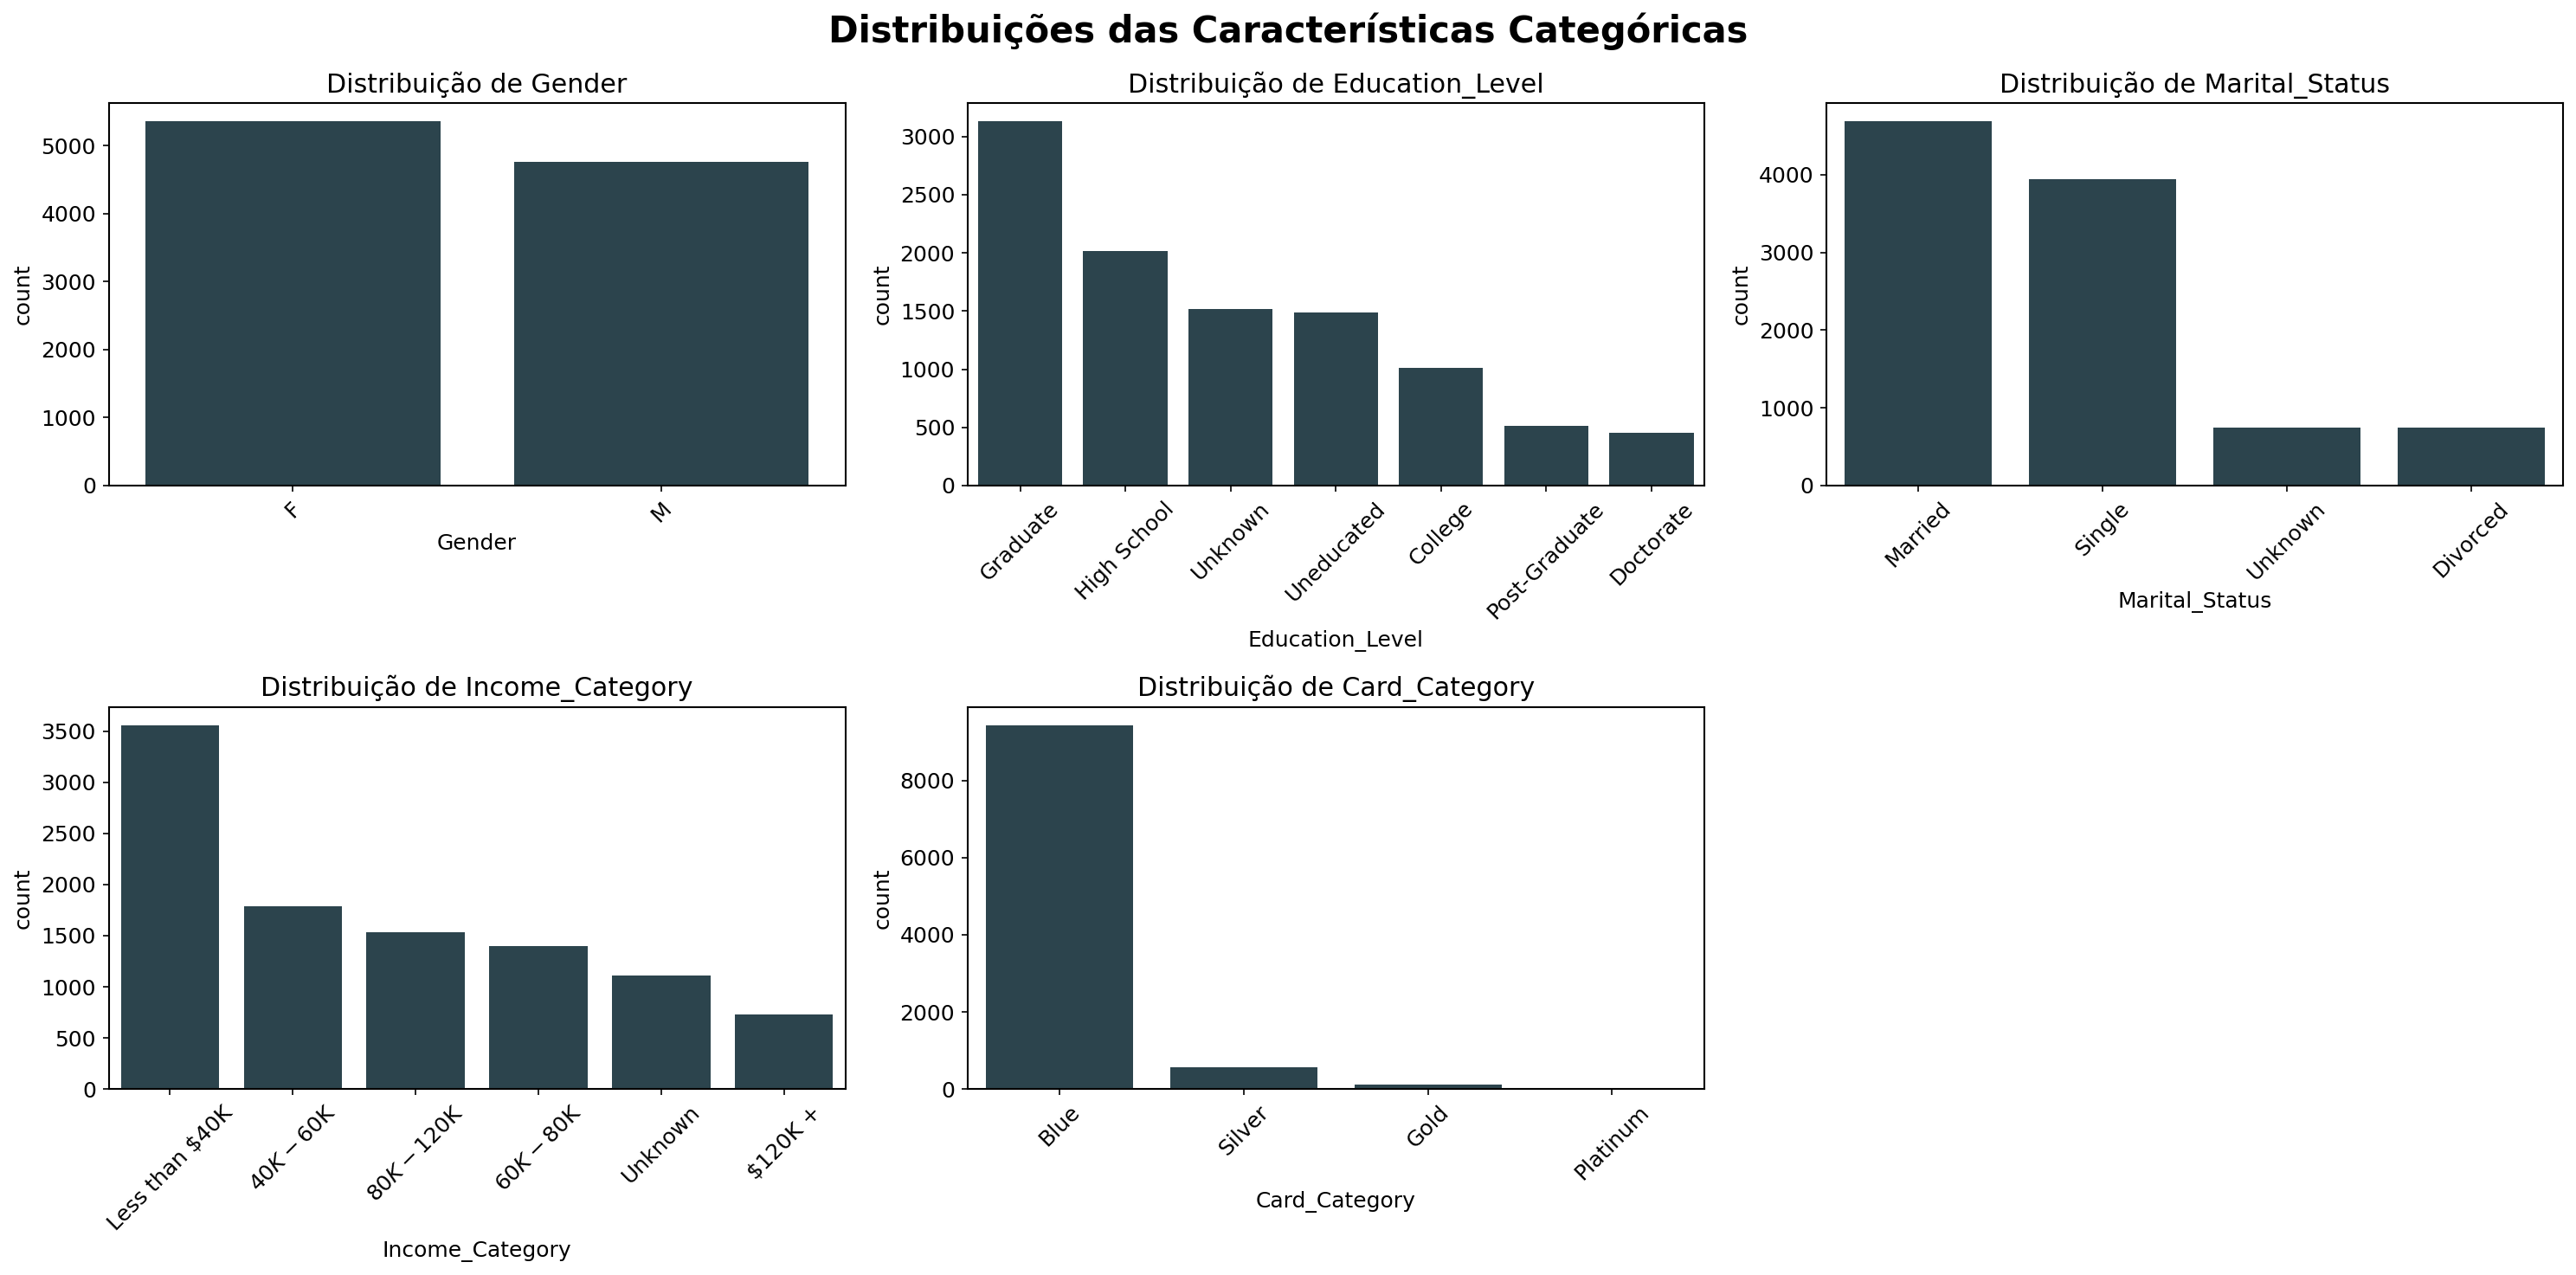

In [ ]:
plt.figure(figsize=(20, 10))

categorical_features = X_train.select_dtypes('object').columns.tolist()

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.suptitle('Distribuições das Características Categóricas', fontsize=20, fontweight='bold')
    plt.title(f'Distribuição de {feature}')
    plt.xticks(rotation=45)
    plt.grid(False)  # Remover linhas de grade
plt.tight_layout()
plt.show()

**Matriz de correlação**

In [ ]:
train['Attrition_Flag'] = train['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

corr_matrix = train.corr(numeric_only=True)

corr_matrix['Attrition_Flag'].sort_values(ascending=False)

,Attrition_Flag
Attrition_Flag,1.000000
Contacts_Count_12_mon,0.208318
Months_Inactive_12_mon,0.156656
Dependent_count,0.020101
Customer_Age,0.015240
Months_on_book,0.010829
Avg_Open_To_Buy,0.000404
Credit_Limit,-0.022775
"CLIENTNUM""",-0.041615
Total_Amt_Chng_Q4_Q1,-0.139358


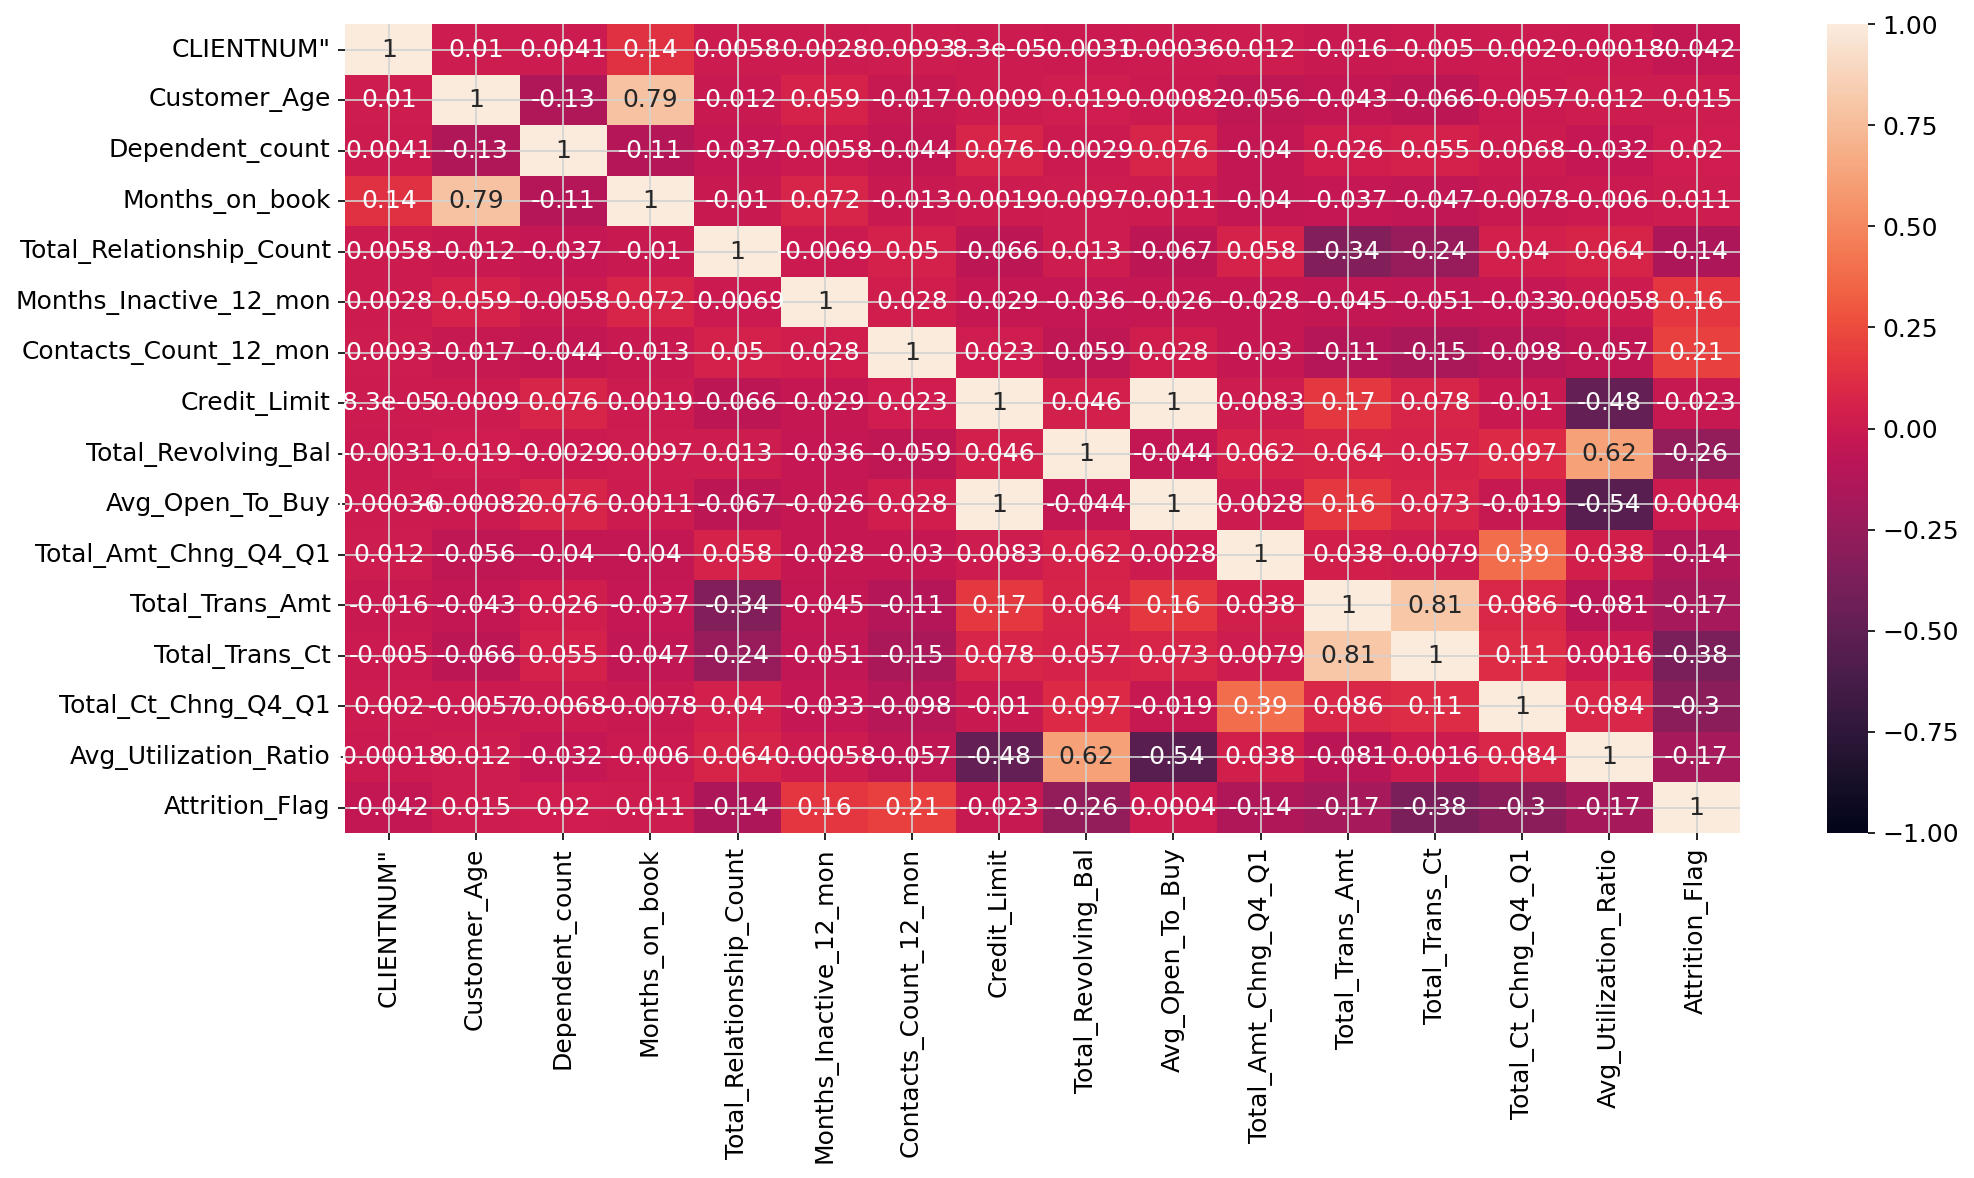

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

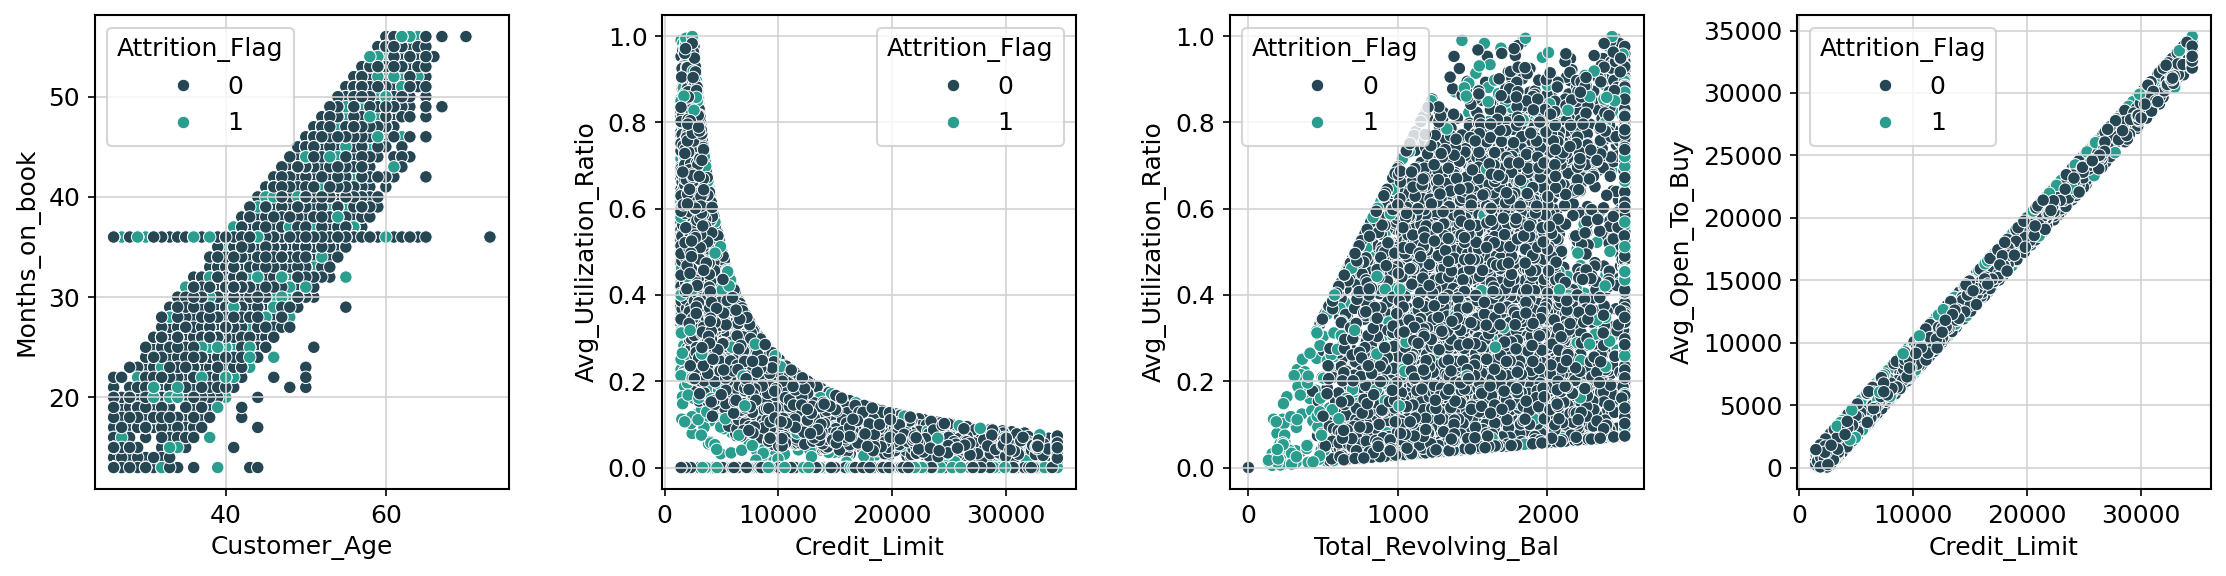

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
sns.scatterplot(data=train, x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', ax=axes[0])
sns.scatterplot(data=train, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag', ax=axes[1])
sns.scatterplot(data=train, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', hue='Attrition_Flag', ax=axes[2])
sns.scatterplot(data=train, x='Credit_Limit', y='Avg_Open_To_Buy', hue='Attrition_Flag', ax=axes[3])
plt.tight_layout()
plt.show()

**Distribuições das características numéricas por flag de churn**





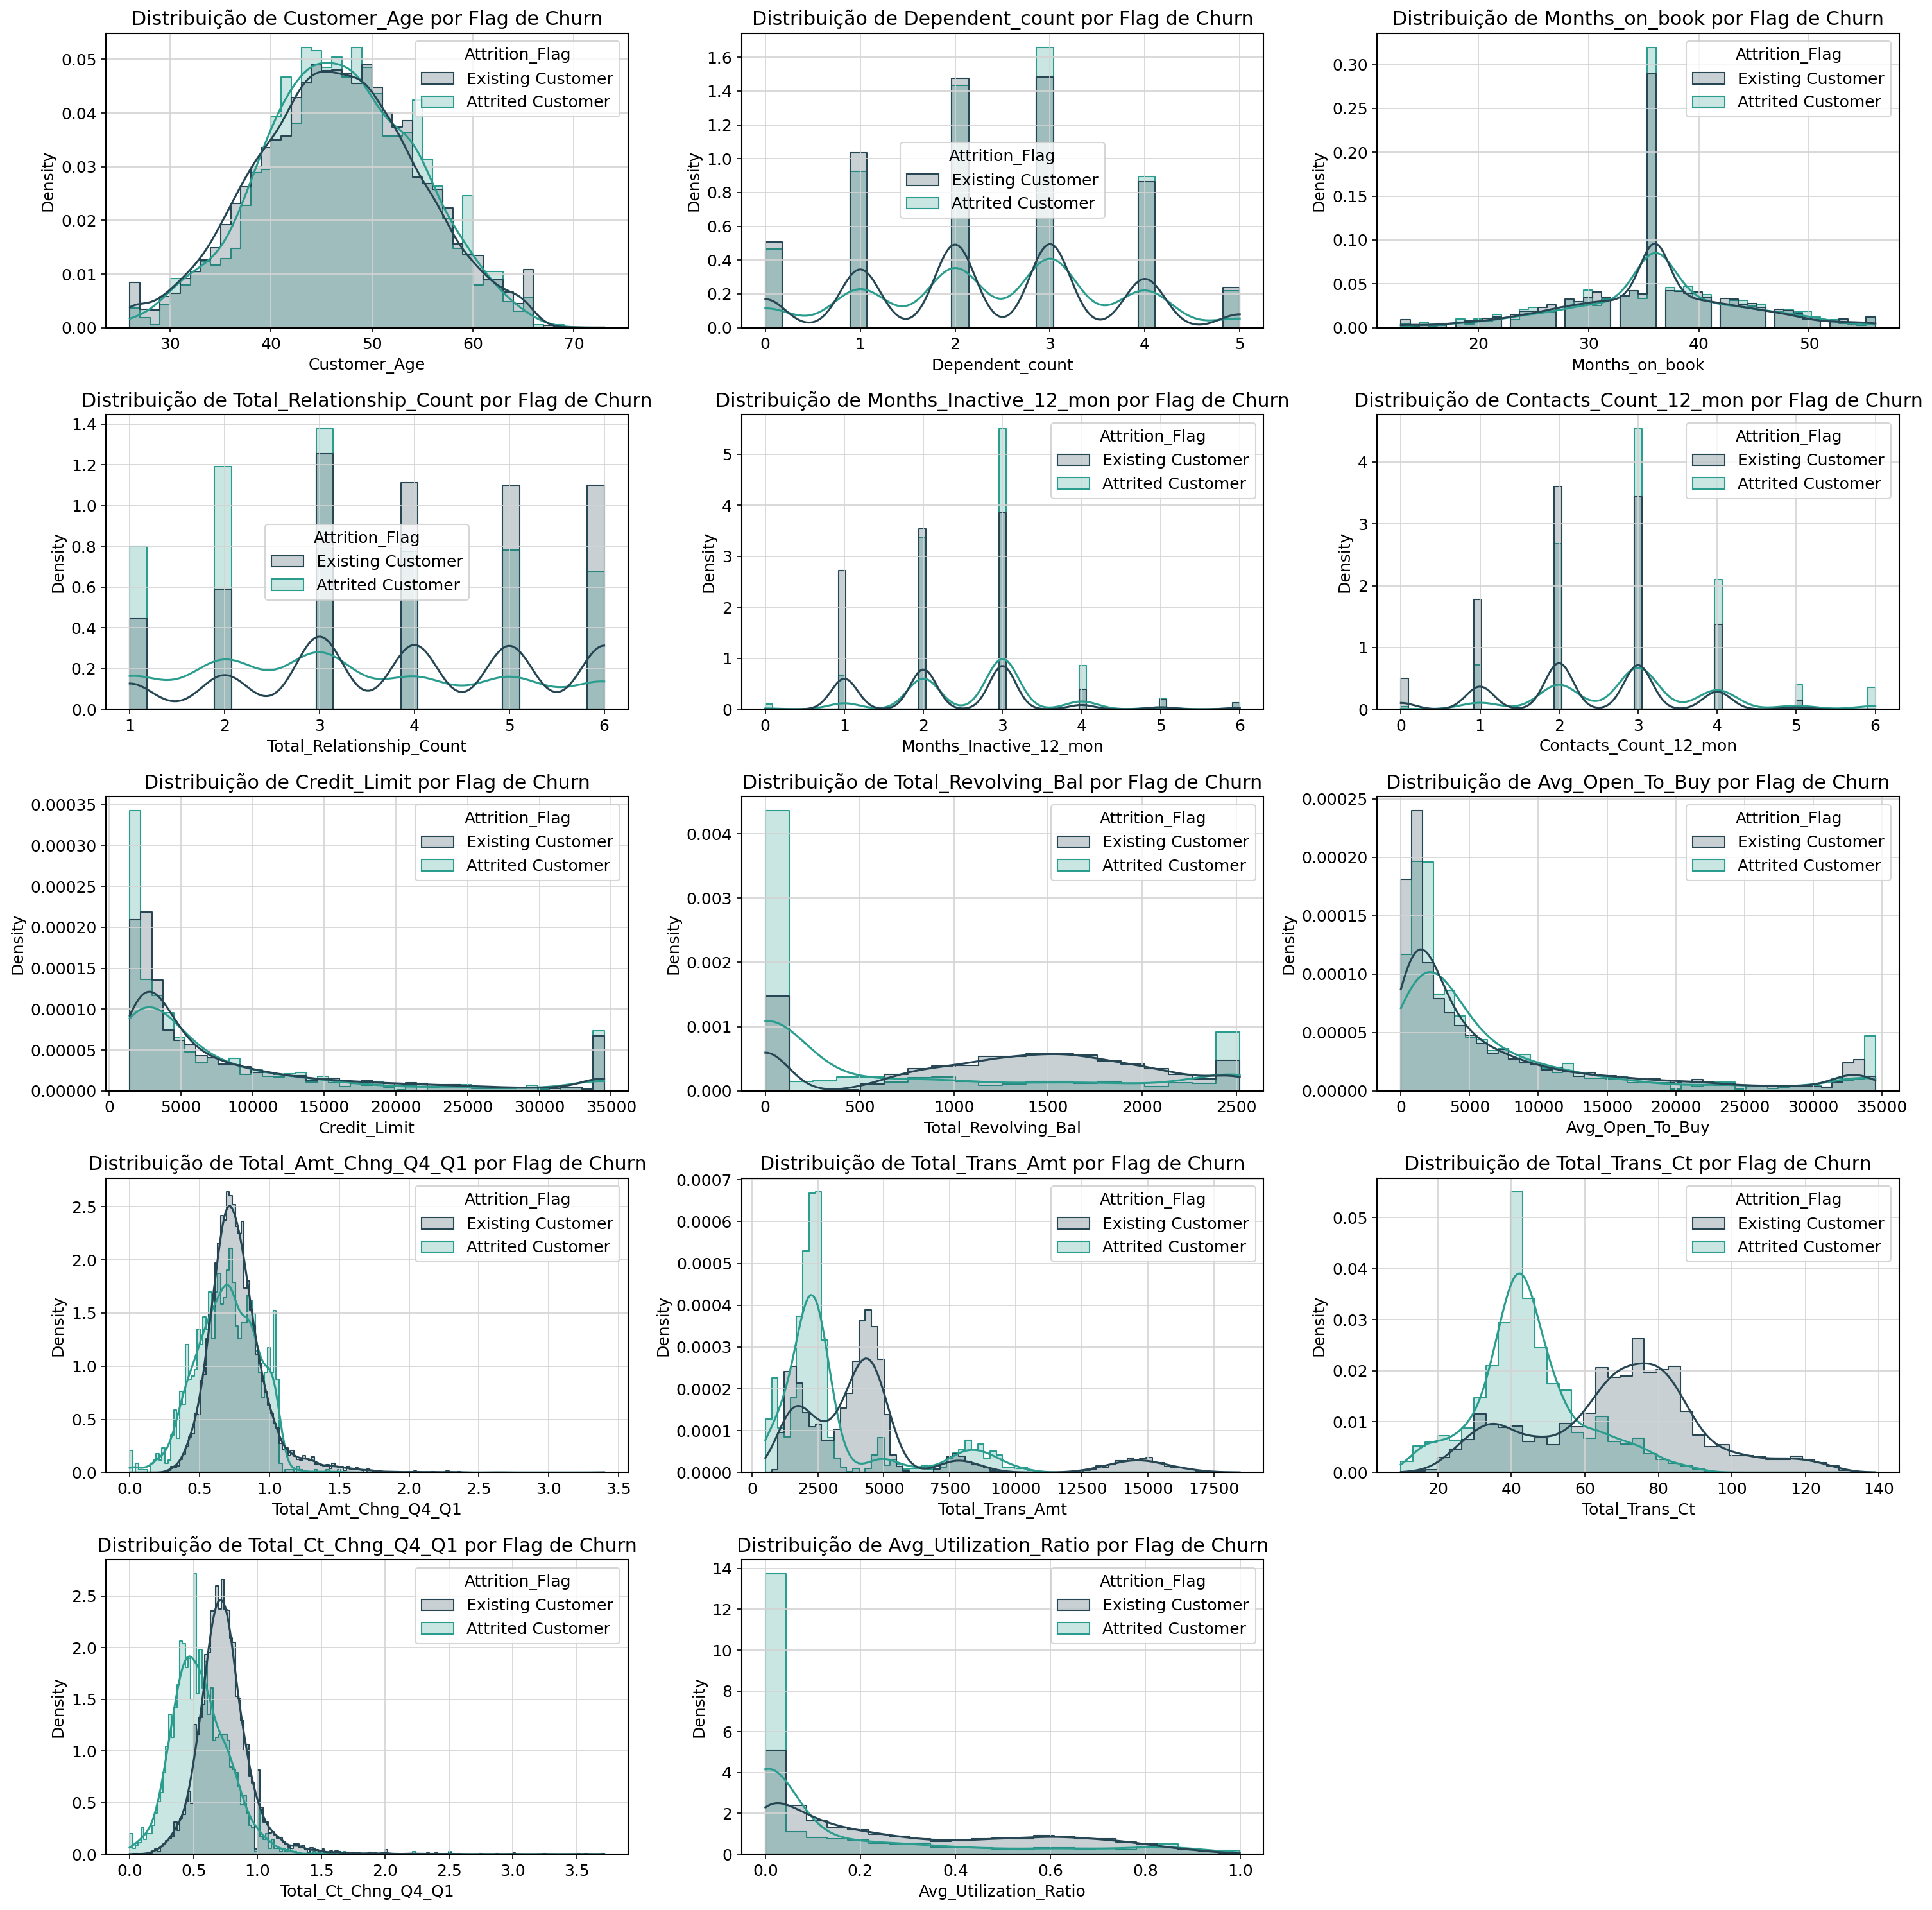

In [ ]:
# Plotar as distribuições das características numéricas por flag de churn
plt.figure(figsize=(20, 20))
num_cols = 3

# Define numerical_features here, replacing with your actual list of features
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

num_rows = int(np.ceil(len(numerical_features) / num_cols))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(data=df, x=feature, hue='Attrition_Flag', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribuição de {feature} por Flag de Churn')
plt.tight_layout()
plt.show()